# Trabalho 1 

O objetivo deste exercício é estudar o comportamento de algoritmos de busca em linha em duas funções diferentes. O método utilizado será o de Falsa Posição.

## Importando bibliotecas

In [4]:
import numpy as np
import matplotlib.pyplot as plt




$$ f_Q(\vec{x}) = x_1² + 2x_2² + x_1x_2 - 2x_1 + x_2$$
$$ f_R(\vec{x}) = 100(x_1 - x_2^2)² + (1 - x_1)² $$

## Construindo funções necessárias para o exercício

Serão implementadas duas funções: uma quadrática e a função de Rosenbrock, dadas respectivamente por:

$$ f_Q(\vec{x}) = x_1² + 2x_2² + x_1x_2 - 2x_1 + x_2$$
$$ f_R(\vec{x}) = 100(x_1 - x_2^2)² + (1 - x_1)² $$

Seus gradientes são dados por:

$$ f_Q(\vec{x}) = [2x_1 x_2 - 2, 4x_2 + x_1 + 1]^T$$
$$ f_R(\vec{x}) = 100[2(x_1 - x_2^2) -2(1 - x_1), 4(x_1 - x_2^2)x_2]^T$$

In [5]:
def fR(x):
    return 100*( (x[0] - x[1]**2)**2 + (1 - x[0])**2 )

def fQ(x):
    return x[0]**2 + 2*x[1]**2 + x[0]*x[1] - 2*x[0] + x[1]

def grad_fR(x):
    return [100*( 2*(x[0] - x[1]**2) - 2*(1 - x[0]) ), 
            100*( 4*(x[0] - x[1]**2)*x[1] )] 

def grad_fQ(x):
    return [2*x[0]*x[1] - 2,
            4*x[1] + x[0] + 1]

## Implementando algoritmo de busca em linha

O objetivo do método da falsa posição é encontrar os pontos onde uma dada função $f(x)$ se torna nula. Ao aplicarmos isso no gradiente de nossas funções, encontramos os seus pontos de estacionaridade, e portanto seus pontos de mínimo, máximo ou inflexão.

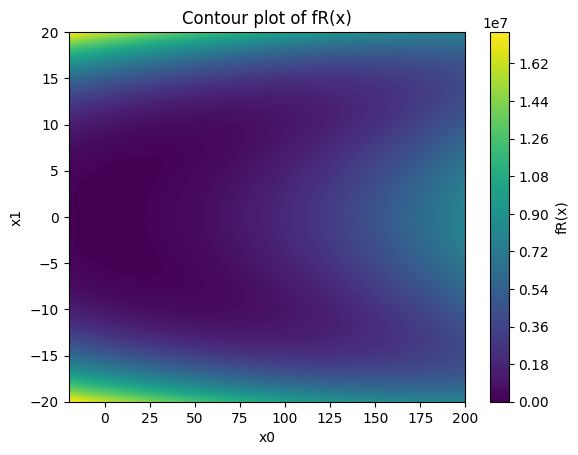

In [21]:
# Define the function fR
def fR(x):
    return 100 * ((x[0] - x[1]**2)**2 + (1 - x[0])**2)

# Define the ranges for x0 and x1
x0 = np.linspace(-20, 200, 1000)
x1 = np.linspace(-20, 20, 1000)

# Create a meshgrid
X0, X1 = np.meshgrid(x0, x1)

# Define a vectorized function to apply fR to each pair of (x0, x1)
def fR_on_grid(X0, X1):
    Z = np.zeros_like(X0)
    for i in range(X0.shape[0]):
        for j in range(X0.shape[1]):
            Z[i, j] = fR([X0[i, j], X1[i, j]])
    return Z

# Evaluate the function on the grid
Z = fR_on_grid(X0, X1)

# Create a contour plot of the function
plt.contourf(X0, X1, Z, levels=200, cmap='viridis')
plt.colorbar(label='fR(x)')
plt.xlabel('x0')
plt.ylabel('x1')
plt.title('Contour plot of fR(x)')
plt.show()

# Trabalho 2
 O objetivo agora é implementar métodos de otmização em sua totalidade, e analisar seu comportamento nas mesmas funções do trabalho 1. Aqui, iremos estudar os algoritmos de descida de gradiente e de Newton. 